# Signaling Game Simulation Plots

## Requirements

In [2]:
import json
import matplotlib.pyplot as plt
import numpy as np
from typing import *

import plots
import simulations
import utils

## Load a simulation

In [7]:
simulation_name = "untrained/extremity_game_simulation_o_3__c_(6, 3)__m_2__sharedcontext_1__strict_context_1"
simulation = simulations.load_simulation(simulation_name)
evaluations = simulation.evaluations

/Users/nur/.virtualenvs/ens/lib/python3.7/site-packages/dataclasses_json/core.py:138: RuntimeWarning: `NoneType` object value of non-optional type target_function detected when decoding Simulation.
  warnings.warn(f"`NoneType` object {warning}.", RuntimeWarning)
/Users/nur/.virtualenvs/ens/lib/python3.7/site-packages/dataclasses_json/core.py:138: RuntimeWarning: `NoneType` object value of non-optional type context_generator detected when decoding Simulation.
  warnings.warn(f"`NoneType` object {warning}.", RuntimeWarning)


In [8]:
print(simulation.name)
print(f"Simulation message sizes: {list(evaluations.keys())}")
print(f"Number of trials per evaluation: {len(evaluations[2])}")

extremity_game_simulation_o_3__c_(6, 3)__m_2__sharedcontext_1__strict_context_1
Simulation message sizes: [2]
Number of trials per evaluation: 20


## Available simulations

In [3]:
strict_context_simulations = {
    "Strict, shared\nO=5, C=(10,5)": "acl_ready/extremity_game_acl_o_5__object_size_5__strict_context_1__shared_context_1__nature_includes_function_1__num_objects_10__mini_batch_size_128__num_batches_5000",
    "Strict, non-shared\nO=5, C=(10,5)": "acl_ready/extremity_game_acl_o_5__object_size_5__strict_context_1__shared_context_0__nature_includes_function_1__num_objects_10__mini_batch_size_128__num_batches_5000",
    "Strict, shared\nO=3, C=(6,3)": "acl_ready/extremity_game_acl_o_3__object_size_3__strict_context_1__shared_context_1__nature_includes_function_1__num_objects_6__mini_batch_size_128__num_batches_5000",
    "Strict, non-shared\nO=3, C=(6,3)": "acl_ready/extremity_game_acl_o_3__object_size_3__strict_context_1__shared_context_0__nature_includes_function_1__num_objects_6__mini_batch_size_128__num_batches_5000",
}

non_strict_context_simulations = {
    "Non-strict, shared\nO=5, C=(10,5)": "trained/extremity_game_simulation_o_5__c_(10, 5)__m_2__sharedcontext_1__strict_context_0",
    "Non-Strict, non-shared\nO=5, C=(10,5)": "trained/extremity_game_simulation_o_5__c_(10, 5)__m_2__sharedcontext_0__strict_context_0",
    "Non-strict, shared\nO=5, C=(15,5)": "trained/extremity_game_simulation_o_5__c_(15, 5)__m_2__sharedcontext_1__strict_context_0",
    "Non-strict, non-shared\nO=5, C=(15,5)": "trained/extremity_game_simulation_o_5__c_(15, 5)__m_2__sharedcontext_0__strict_context_0",
    "Non-strict, shared\nO=5, C=(5,5)": "acl_ready/extremity_game_acl_o_5__object_size_5__strict_context_0__shared_context_1__nature_includes_function_1__num_objects_5__mini_batch_size_128__num_batches_5000",
    "Non-strict, non-shared\nO=5, C=(5,5)": "trained/extremity_game_simulation_o_5__c_(5, 5)__m_2__sharedcontext_0__strict_context_0",
}

# Untrained

untrained_strict_context_simulations = {
    "Strict, shared\nO=5, C=(10,5)": "untrained/extremity_game_simulation_o_5__c_(10, 5)__m_2__sharedcontext_1__strict_context_1",
    "Strict, non-shared\nO=5, C=(10,5)": "untrained/extremity_game_simulation_o_5__c_(10, 5)__m_2__sharedcontext_0__strict_context_1",
    "Strict, shared\nO=3, C=(6,3)": "untrained/extremity_game_simulation_o_3__c_(6, 3)__m_2__sharedcontext_1__strict_context_1",
    "Strict, non-shared\nO=3, C=(6,3)": "untrained/extremity_game_simulation_o_3__c_(6, 3)__m_2__sharedcontext_0__strict_context_1",
}

untrained_non_strict_context_simulations = {
    "Non-strict, shared\nO=5, C=(10,5)": "untrained/extremity_game_simulation_o_5__c_(10, 5)__m_2__sharedcontext_1__strict_context_0",
    "Non-Strict, non-shared\nO=5, C=(10,5)": "untrained/extremity_game_simulation_o_5__c_(10, 5)__m_2__sharedcontext_0__strict_context_0",
    "Non-strict, shared\nO=5, C=(15,5)": "untrained/extremity_game_simulation_o_5__c_(15, 5)__m_2__sharedcontext_1__strict_context_0",
    "Non-strict, non-shared\nO=5, C=(15,5)": "untrained/extremity_game_simulation_o_5__c_(15, 5)__m_2__sharedcontext_0__strict_context_0",
    "Non-strict, shared\nO=5, C=(5,5)": "untrained/extremity_game_simulation_o_5__c_(5, 5)__m_2__sharedcontext_1__strict_context_0",
    "Non-strict, non-shared\nO=5, C=(5,5)": "untrained/extremity_game_simulation_o_5__c_(5, 5)__m_2__sharedcontext_0__strict_context_0",
}

# Encoder input is f(c)

nature_includes_fc_simulations = {
    "F(c) input\nStrict, shared\nO=5, C=(10,5)": "acl_ready/extremity_game_acl_o_5__object_size_5__strict_context_1__shared_context_1__nature_includes_function_0__num_objects_10__mini_batch_size_128__num_batches_5000",
    "F(c) input\nStrict, non-shared\nO=5, C=(10,5)": "acl_ready/extremity_game_acl_o_5__object_size_5__strict_context_1__shared_context_0__nature_includes_function_0__num_objects_10__mini_batch_size_128__num_batches_5000",
    
    "F(c) input\nStrict, shared\nO=3, C=(6,3)": "acl_ready/extremity_game_acl_o_3__object_size_3__strict_context_1__shared_context_1__nature_includes_function_0__num_objects_6__mini_batch_size_128__num_batches_5000",
    "F(c) input\nStrict, non-shared\nO=3, C=(6,3)": "acl_ready/extremity_game_acl_o_3__object_size_3__strict_context_1__shared_context_0__nature_includes_function_0__num_objects_6__mini_batch_size_128__num_batches_5000",
}

## Available evaluations

In [73]:
print('\n'.join(evaluations[2][0].keys()))

training_losses
object_prediction_accuracy
detected_num_clusters
object_prediction_by_cluster_loss
clusterization_f_score
predictions_by_average_msg_loss
predictions_by_average_msg_accuracy
addition_compositionality_mean_message_loss
addition_compositionality_mean_message_cluster_accuracy
addition_compositionality_mean_prediction_loss
addition_compositionality_mean_prediction_accuracy
analogy_compositionality_net_message_mean_loss
analogy_compositionality_net_message_cluster_mean_accuracy
analogy_compositionality_net_prediction_mean_loss
analogy_compositionality_net_prediction_mean_accuracy
compositionality_net_message_mean_loss
compositionality_net_message_cluster_mean_accuracy
compositionality_net_prediction_mean_loss
compositionality_net_prediction_mean_accuracy
functions_from_messages
min_max_from_messages
dimension_from_messages
sanity_from_messages
object_by_context_from_messages
object_by_decoder_context_from_messages
context_from_messages
decoder_context_from_messages


## Helper functions

In [4]:
def get_evaluation_mean_and_err(simulation_name, evaluation_name, message_size) -> float:
    simulation = simulations.load_simulation(simulation_name)
    vals = []
    for trial in simulation.evaluations[message_size]:
        vals.append(trial[evaluation_name])
    return np.mean(vals), np.std(vals)

In [5]:
def plot_bars_for_evaluation(evaluation_name, display_names_to_simulation_names, title, y_label, width=12, msg_size=2):
    bar_width = 1
    num_simulation_sets = len(display_names_to_simulation_names)

    fig, ax = plt.subplots(num_simulation_sets, figsize=(width,6*num_simulation_sets))
    
    for i, (set_name, display_name_to_simulation) in enumerate(display_names_to_simulation_names.items()):
        for s, (display_name, file_name) in enumerate(display_name_to_simulation.items()):
            mean, err = get_evaluation_mean_and_err(file_name, evaluation_name, msg_size)
            ax[i].bar(s, mean, yerr=err, capsize=10, color=f"C{i}", label=display_name)    

            ax[i].set_title(set_name)
            ax[i].set_xticks(range(len(display_name_to_simulation)))
            ax[i].set_xticklabels(display_name_to_simulation.keys())
            ax[i].set_ylabel(y_label)

    fig.suptitle(title, fontsize=15)
    plt.show()

## General prediction accuracy
Test whether predicted object is closest to target object.

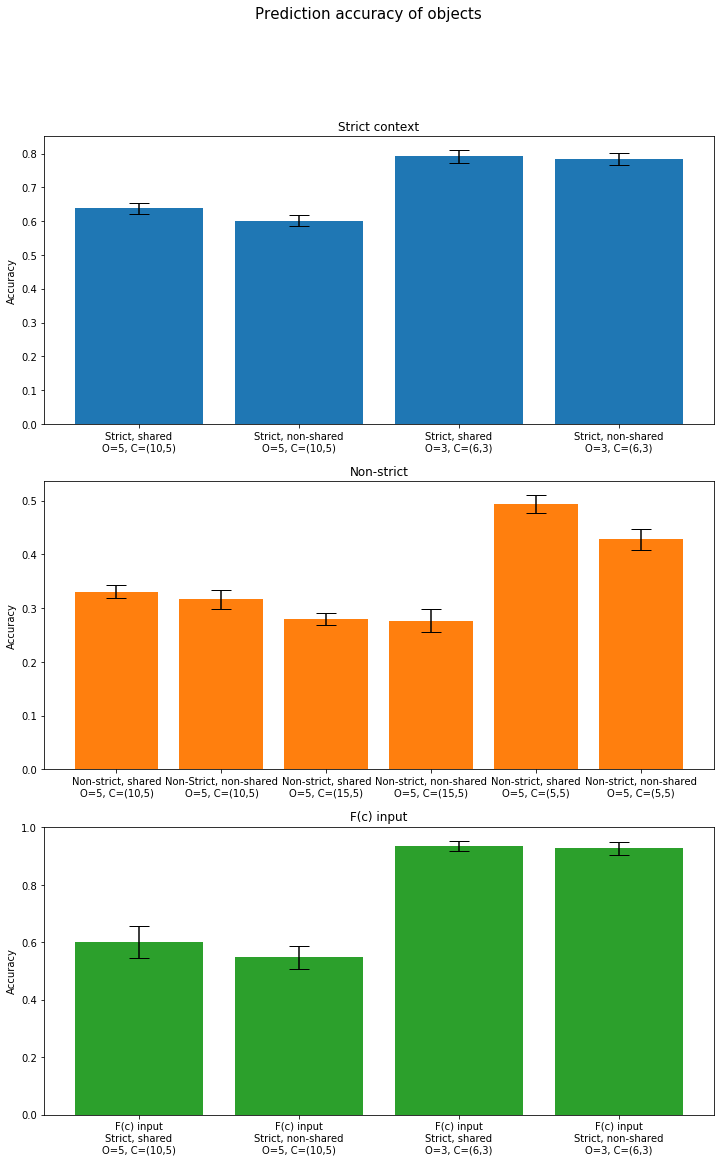

In [12]:
simulation_sets = {"Strict context": strict_context_simulations, "Non-strict": non_strict_context_simulations, "F(c) input": nature_includes_fc_simulations}
plot_bars_for_evaluation("object_prediction_accuracy", simulation_sets, "Prediction accuracy of objects", "Accuracy", width=12)

## Predictions from M

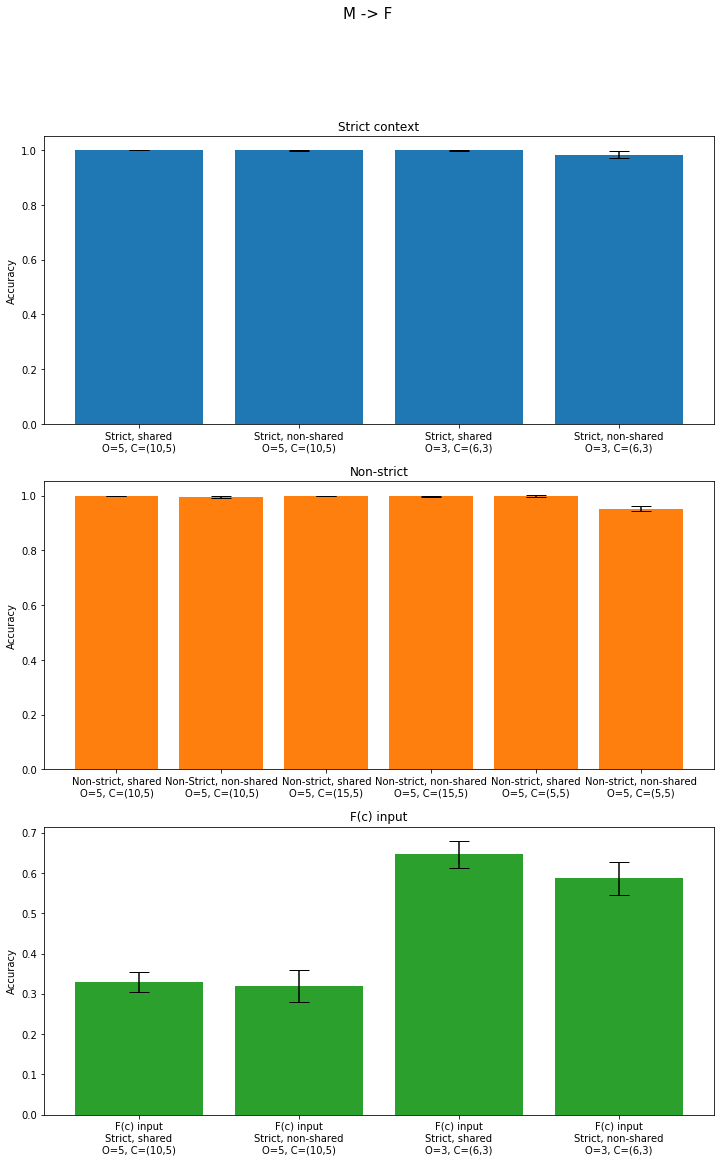

In [13]:
plot_bars_for_evaluation("functions_from_messages", simulation_sets, "M -> F", "Accuracy")

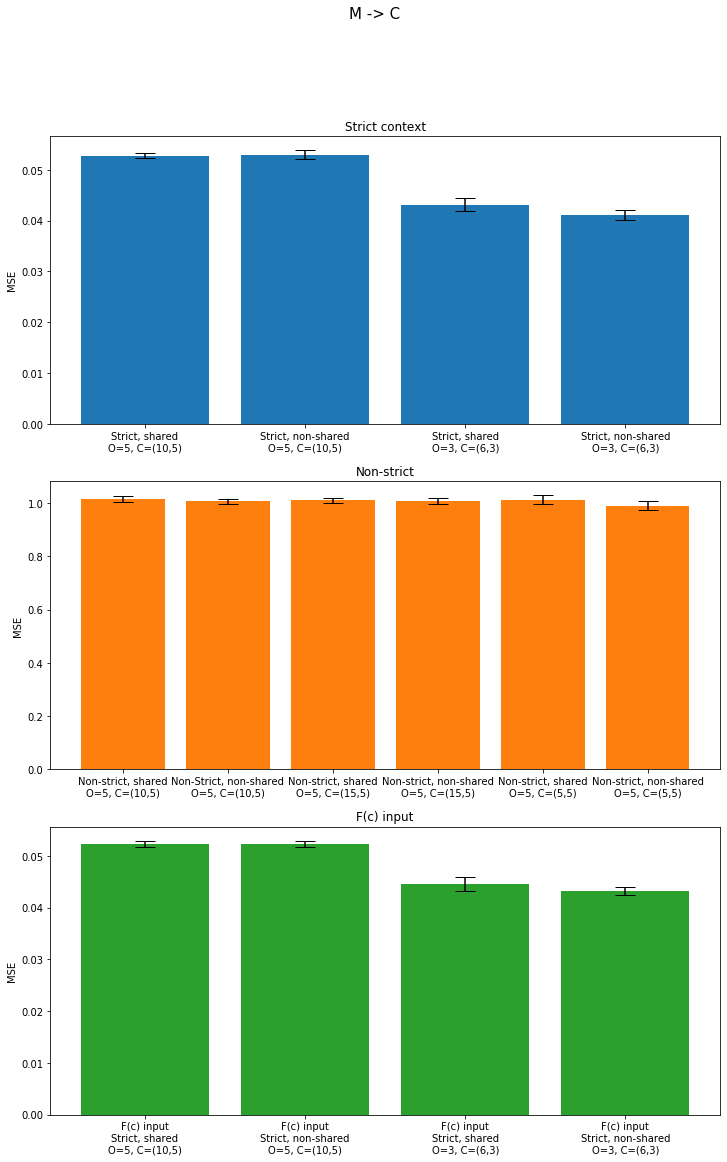

In [14]:
plot_bars_for_evaluation("context_from_messages", simulation_sets, "M -> C", "MSE")

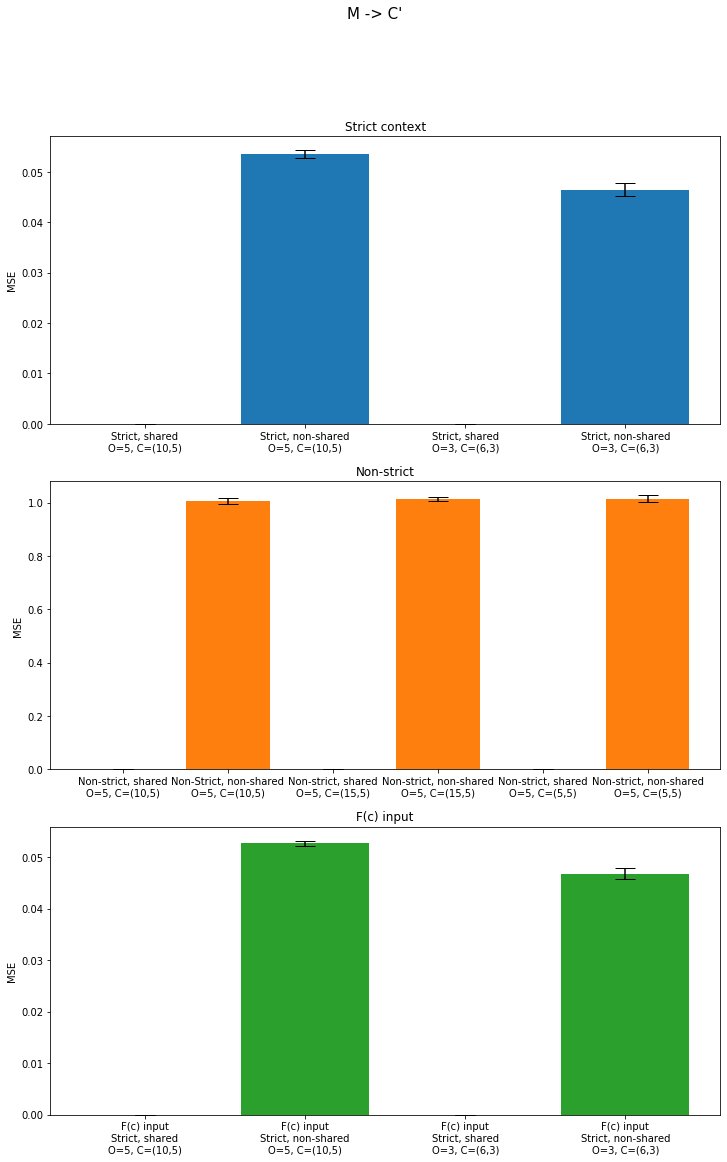

In [15]:
plot_bars_for_evaluation("decoder_context_from_messages", sets, "M -> C'", "MSE")

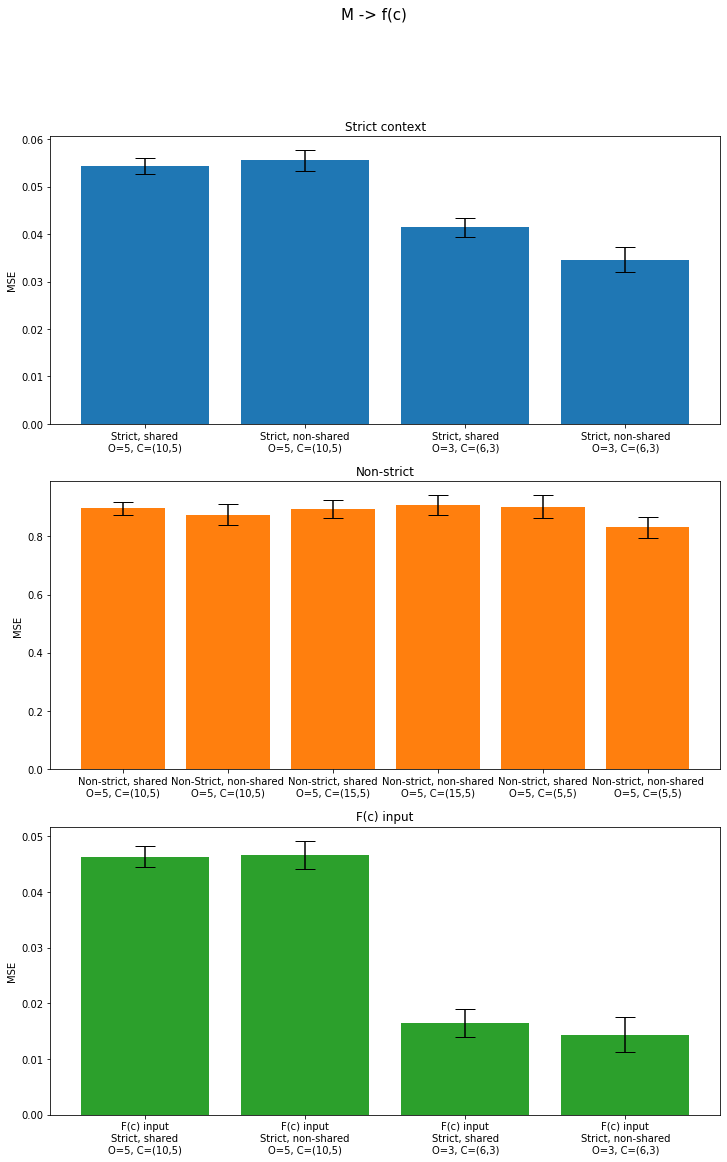

In [16]:
plot_bars_for_evaluation("object_by_context_from_messages", sets, "M -> f(c)", "MSE")

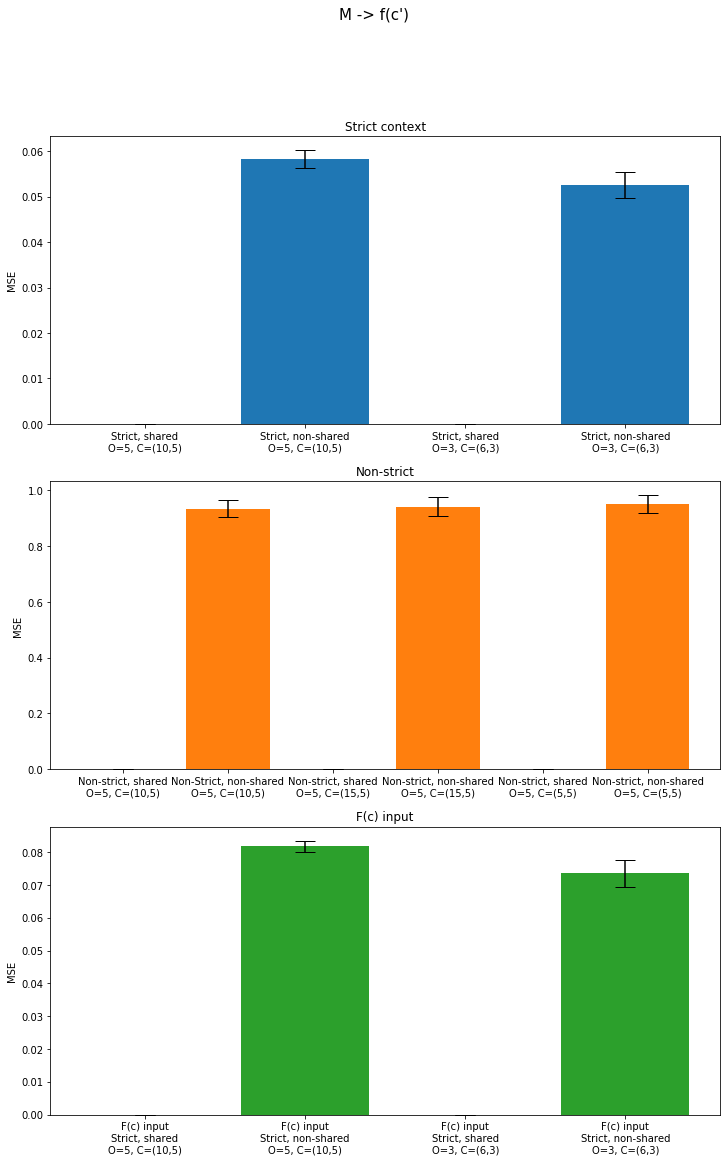

In [17]:
plot_bars_for_evaluation("object_by_decoder_context_from_messages", sets, "M -> f(c')", "MSE")

## Training losses

### Shared vs. Non-shared

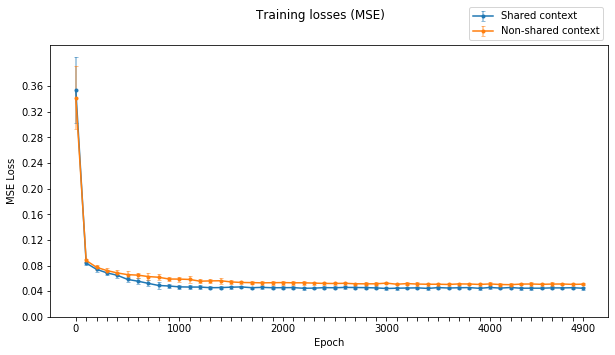

In [269]:
simulation_display_name_to_file_name = {
    "Shared context": "extremity_game_simulation_o_5__c_(10, 5)__m_2__sharedcontext_1__strict_context_1",
    "Non-shared context": "extremity_game_simulation_o_5__c_(10, 5)__m_2__sharedcontext_0__strict_context_1",
} 

plots.plot_simulation_training_loss(simulation_display_name_to_file_name, max_epochs=5000, epoch_interval=100, label_interval=10)

### First 50 epochs

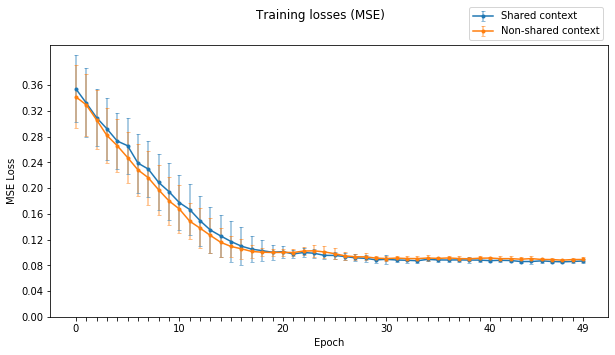

In [274]:
plots.plot_simulation_training_loss(simulation_display_name_to_file_name, max_epochs=50, epoch_interval=1, label_interval=10)

### Strict context, O=5

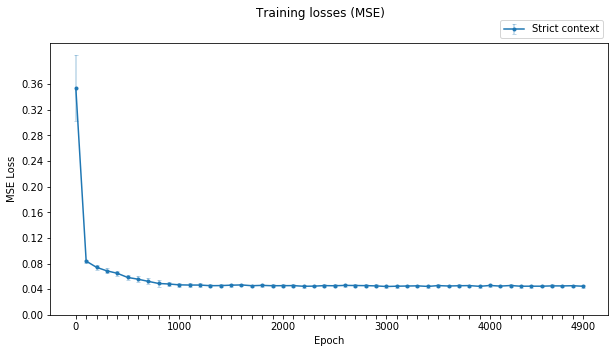

In [5]:
simulation_display_name_to_file_name = {
    "Strict context": "extremity_game_simulation_o_5__c_(10, 5)__m_2__sharedcontext_1__strict_context_1",
} 

plots.plot_simulation_training_loss(simulation_display_name_to_file_name, max_epochs=5000, epoch_interval=100, label_interval=10)

### Non-strict, O=5, C=(15, 5)

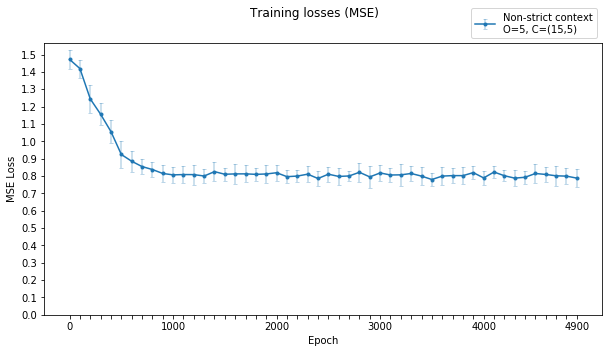

In [41]:
simulation_display_name_to_file_name = {
    "Non-strict context\nO=5, C=(15,5)": "extremity_game_simulation_o_5__c_(15, 5)__m_2__sharedcontext_1__strict_context_0",
} 

plots.plot_simulation_training_loss(simulation_display_name_to_file_name, max_epochs=5000, epoch_interval=100, label_interval=10)

### Non-strict, O=5, C=(10,5)

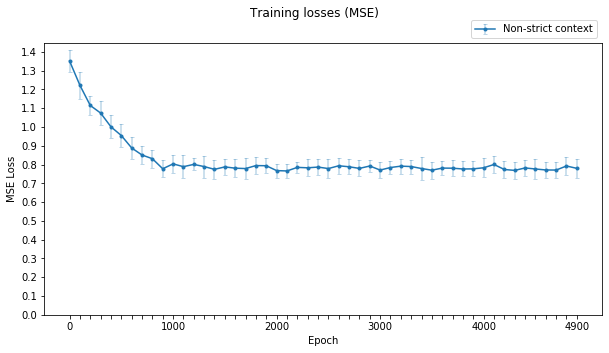

In [12]:
simulation_display_name_to_file_name = {
    "Non-strict context": "extremity_game_simulation_o_5__c_(10, 5)__m_2__sharedcontext_1__strict_context_0",
} 

plots.plot_simulation_training_loss(simulation_display_name_to_file_name, max_epochs=5000, epoch_interval=100, label_interval=10)

### Non-strict, O=5, C=(5,5)

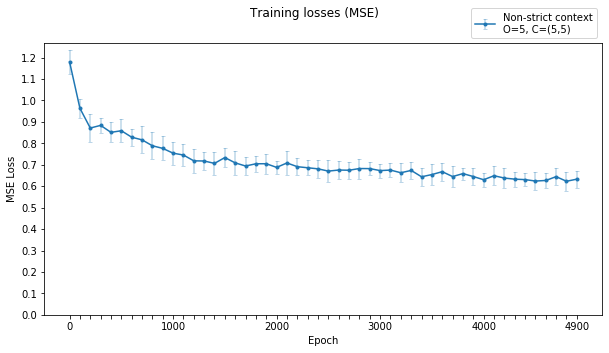

In [43]:
simulation_display_name_to_file_name = {
    "Non-strict context\nO=5, C=(5,5)": "extremity_game_simulation_o_5__c_(5, 5)__m_2__sharedcontext_1__strict_context_0",
} 

plots.plot_simulation_training_loss(simulation_display_name_to_file_name, max_epochs=5000, epoch_interval=100, label_interval=10)

## Clustering

### Cluster-function F1-score

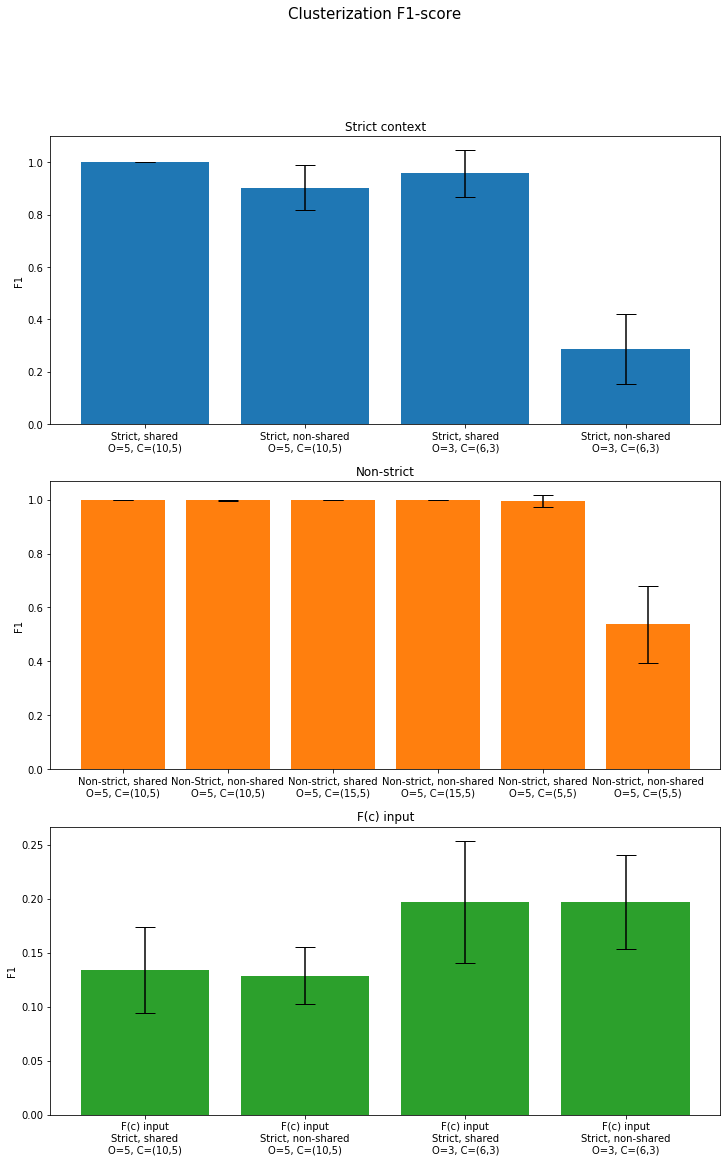

In [18]:
sets = {"Strict context": strict_context_simulations, "Non-strict": non_strict_context_simulations, "F(c) input": nature_includes_fc_simulations}
plot_bars_for_evaluation("clusterization_f_score", sets, "Clusterization F1-score", "F1", width=12)

### Prediction by cluster average message

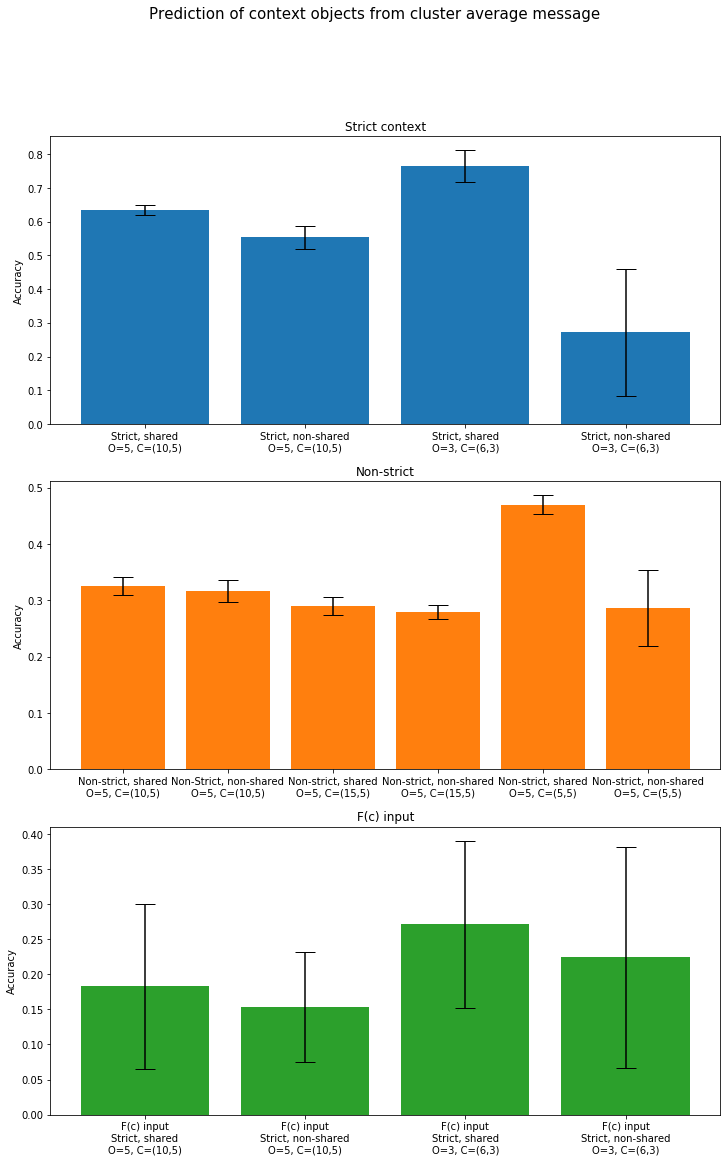

In [19]:
plot_bars_for_evaluation("predictions_by_average_msg_accuracy", sets, "Prediction of context objects from cluster average message", "Accuracy", width=12)

## Compositionality
(need to think how to plot, losses are on different scales for M/O)

### Message inference using addition 

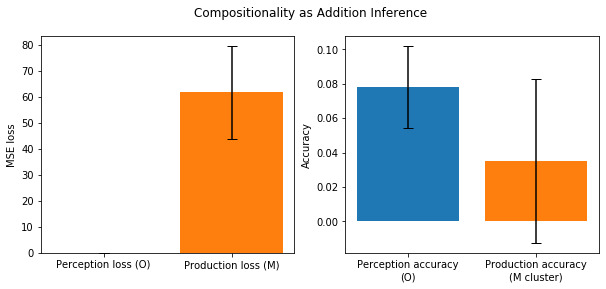

In [74]:
simulation_name = "Shared, strict context"
simulation_file_name = "trained/extremity_game_simulation_o_5__c_(10, 5)__m_2__sharedcontext_1__strict_context_1"

message_size = 2

loss_evals = {
    "Perception loss (O)": "addition_compositionality_mean_prediction_loss",
    "Production loss (M)": "addition_compositionality_mean_message_loss",
}
accuracy_evals = {
    "Perception accuracy\n(O)": "addition_compositionality_mean_prediction_accuracy",
    "Production accuracy\n(M cluster)": "addition_compositionality_mean_message_cluster_accuracy",
}

fig, ax = plt.subplots(1,2, figsize=(10,4))
bar_width = 1

for i, (display_name, eval_name) in enumerate(loss_evals.items()):
    mean, err = get_evaluation_mean_and_err(simulation_file_name, eval_name, message_size)
    ax[0].bar(i, mean, yerr=err, capsize=5, color=f"C{i}", label=display_name)

for i, (display_name, eval_name) in enumerate(accuracy_evals.items()):
    mean, err = get_evaluation_mean_and_err(simulation_file_name, eval_name, message_size)
    ax[1].bar(i, mean, yerr=err, capsize=5, color=f"C{i}", label=display_name)

ax[0].set_xticks(range(len(accuracy_evals)))
ax[0].set_xticklabels(list(loss_evals.keys()))

ax[1].set_xticks(range(len(loss_evals)))
ax[1].set_xticklabels(list(accuracy_evals.keys()))
    
ax[0].set_ylabel("MSE loss")
ax[1].set_ylabel("Accuracy")
fig.suptitle('Compositionality as Addition Inference')
plt.show()

### Message inference using Analogy Network

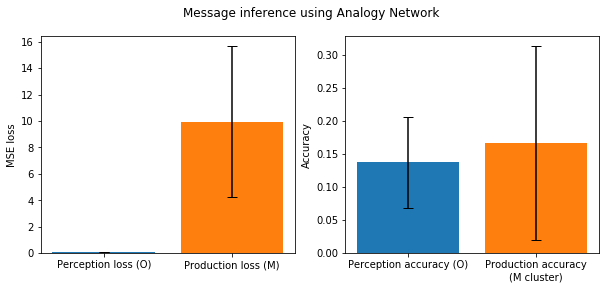

In [77]:
simulation_name = "Shared, strict context"
simulation_file_name = "trained/extremity_game_simulation_o_5__c_(10, 5)__m_2__sharedcontext_1__strict_context_1"

message_size = 2

loss_evals = {
    "Perception loss (O)": "analogy_compositionality_net_prediction_mean_loss",
    "Production loss (M)": "analogy_compositionality_net_message_mean_loss"
}
accuracy_evals = {
    "Perception accuracy (O)": "analogy_compositionality_net_prediction_mean_accuracy",
    "Production accuracy\n(M cluster)": "analogy_compositionality_net_message_cluster_mean_accuracy"
}

fig, ax = plt.subplots(1,2, figsize=(10,4))
bar_width = 1

for i, (display_name, eval_name) in enumerate(loss_evals.items()):
    mean, err = get_evaluation_mean_and_err(simulation_file_name, eval_name, message_size)
    ax[0].bar(i, mean, yerr=err, capsize=5, color=f"C{i}", label=display_name)

for i, (display_name, eval_name) in enumerate(accuracy_evals.items()):
    mean, err = get_evaluation_mean_and_err(simulation_file_name, eval_name, message_size)
    ax[1].bar(i, mean, yerr=err, capsize=5, color=f"C{i}", label=display_name)

ax[0].set_xticks(range(len(accuracy_evals)))
ax[0].set_xticklabels(list(loss_evals.keys()))

ax[1].set_xticks(range(len(loss_evals)))
ax[1].set_xticklabels(list(accuracy_evals.keys()))
    
ax[0].set_ylabel("MSE loss")
ax[1].set_ylabel("Accuracy")
fig.suptitle('Message inference using Analogy Network')
plt.show()

### Message inference using Compositionality Network (argmin_k from argmax_k)

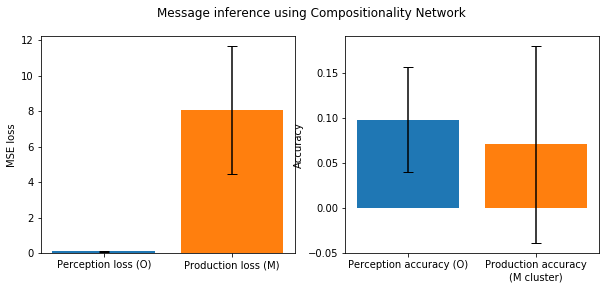

In [107]:
simulation_name = "Shared, strict context"
simulation_file_name = "trained/extremity_game_simulation_o_5__c_(10, 5)__m_2__sharedcontext_1__strict_context_1"

message_size = 2

loss_evals = {
    "Perception loss (O)": "compositionality_net_prediction_mean_loss",
    "Production loss (M)": "compositionality_net_message_mean_loss"
}
accuracy_evals = {
    "Perception accuracy (O)": "compositionality_net_prediction_mean_accuracy",
    "Production accuracy\n(M cluster)": "compositionality_net_message_cluster_mean_accuracy"
}

fig, ax = plt.subplots(1,2, figsize=(10,4))
bar_width = 1

for i, (display_name, eval_name) in enumerate(loss_evals.items()):
    mean, err = get_evaluation_mean_and_err(simulation_file_name, eval_name, message_size)
    ax[0].bar(i, mean, yerr=err, capsize=5, color=f"C{i}", label=display_name)

for i, (display_name, eval_name) in enumerate(accuracy_evals.items()):
    mean, err = get_evaluation_mean_and_err(simulation_file_name, eval_name, message_size)
    ax[1].bar(i, mean, yerr=err, capsize=5, color=f"C{i}", label=display_name)

ax[0].set_xticks(range(len(accuracy_evals)))
ax[0].set_xticklabels(list(loss_evals.keys()))

ax[1].set_xticks(range(len(loss_evals)))
ax[1].set_xticklabels(list(accuracy_evals.keys()))
    
ax[0].set_ylabel("MSE loss")
ax[1].set_ylabel("Accuracy")
fig.suptitle('Message inference using Compositionality Network')
plt.show()

# Message visualizations

## Encoder input is <c, f(c)>

In [21]:
def visualize_messages(simulation_name):
    simulation = simulations.load_simulation(simulation_name)
    games=simulations.load_games(simulation_name)
    message_size = simulation.message_sizes[0]
    games[message_size][0].visualize()

### O=5, Shared context

/Users/nur/.virtualenvs/ens/lib/python3.7/site-packages/dataclasses_json/core.py:138: RuntimeWarning: `NoneType` object value of non-optional type target_function detected when decoding Simulation.
  warnings.warn(f"`NoneType` object {warning}.", RuntimeWarning)
/Users/nur/.virtualenvs/ens/lib/python3.7/site-packages/dataclasses_json/core.py:138: RuntimeWarning: `NoneType` object value of non-optional type context_generator detected when decoding Simulation.
  warnings.warn(f"`NoneType` object {warning}.", RuntimeWarning)


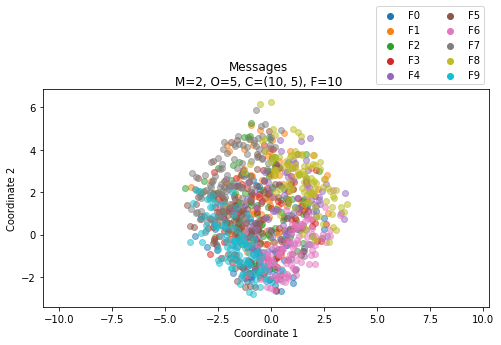

06-12-2019:15:20:06.680 INFO [game.py:312] Number of predicted clusters: 1


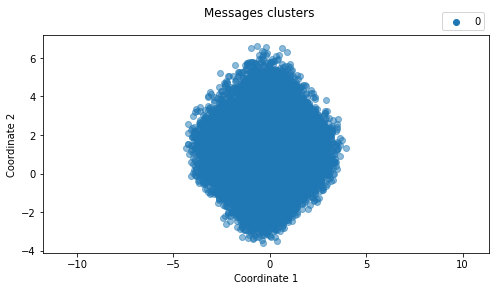

In [24]:
simulation_name = "acl_ready/extremity_game_acl_o_5__object_size_5__strict_context_1__shared_context_1__nature_includes_function_0__num_objects_10__mini_batch_size_128__num_batches_5000"
visualize_messages(simulation_name)

### O=5, Non-shared context

/Users/nur/.virtualenvs/ens/lib/python3.7/site-packages/dataclasses_json/core.py:138: RuntimeWarning: `NoneType` object value of non-optional type target_function detected when decoding Simulation.
  warnings.warn(f"`NoneType` object {warning}.", RuntimeWarning)
/Users/nur/.virtualenvs/ens/lib/python3.7/site-packages/dataclasses_json/core.py:138: RuntimeWarning: `NoneType` object value of non-optional type context_generator detected when decoding Simulation.
  warnings.warn(f"`NoneType` object {warning}.", RuntimeWarning)


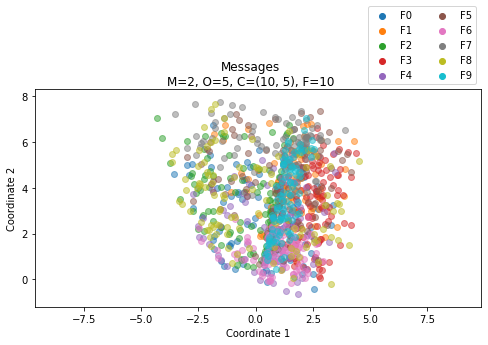

06-12-2019:15:22:20.818 INFO [game.py:312] Number of predicted clusters: 1


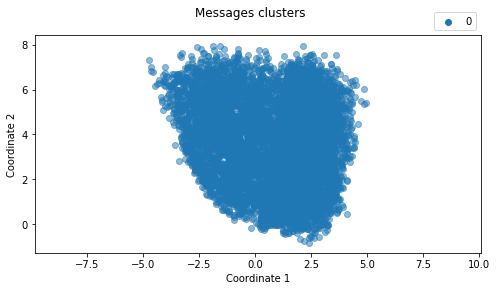

In [28]:
simulation_name = "acl_ready/extremity_game_acl_o_5__object_size_5__strict_context_1__shared_context_0__nature_includes_function_0__num_objects_10__mini_batch_size_128__num_batches_5000"
visualize_messages(simulation_name)

### O=3, Shared context

/Users/nur/.virtualenvs/ens/lib/python3.7/site-packages/dataclasses_json/core.py:138: RuntimeWarning: `NoneType` object value of non-optional type target_function detected when decoding Simulation.
  warnings.warn(f"`NoneType` object {warning}.", RuntimeWarning)
/Users/nur/.virtualenvs/ens/lib/python3.7/site-packages/dataclasses_json/core.py:138: RuntimeWarning: `NoneType` object value of non-optional type context_generator detected when decoding Simulation.
  warnings.warn(f"`NoneType` object {warning}.", RuntimeWarning)


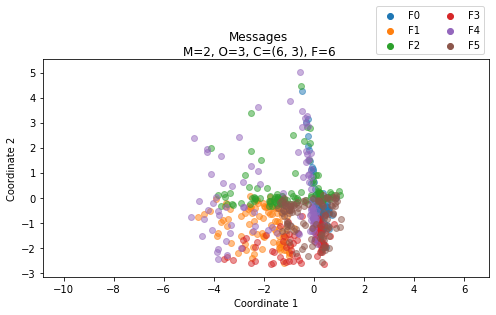

06-12-2019:15:20:28.315 INFO [game.py:312] Number of predicted clusters: 2


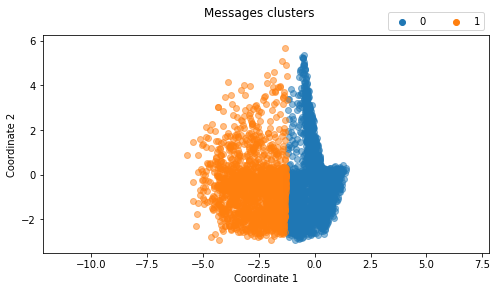

In [25]:
simulation_name = "acl_ready/extremity_game_acl_o_3__object_size_3__strict_context_1__shared_context_1__nature_includes_function_0__num_objects_6__mini_batch_size_128__num_batches_5000"
visualize_messages(simulation_name)

### O=3, Non-shared context

/Users/nur/.virtualenvs/ens/lib/python3.7/site-packages/dataclasses_json/core.py:138: RuntimeWarning: `NoneType` object value of non-optional type target_function detected when decoding Simulation.
  warnings.warn(f"`NoneType` object {warning}.", RuntimeWarning)
/Users/nur/.virtualenvs/ens/lib/python3.7/site-packages/dataclasses_json/core.py:138: RuntimeWarning: `NoneType` object value of non-optional type context_generator detected when decoding Simulation.
  warnings.warn(f"`NoneType` object {warning}.", RuntimeWarning)


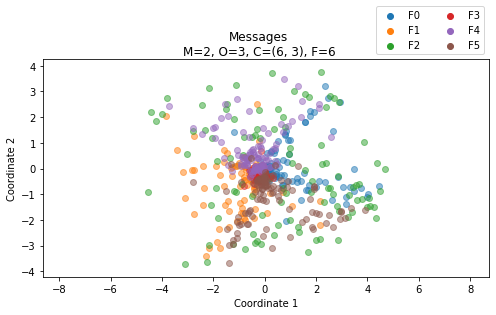

06-12-2019:15:20:46.471 INFO [game.py:312] Number of predicted clusters: 2


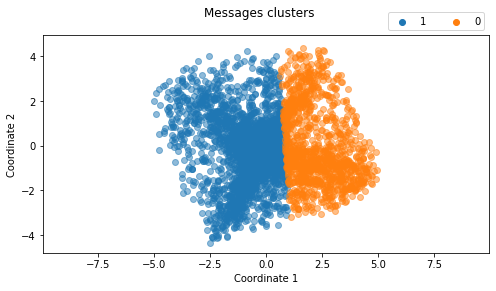

In [26]:
simulation_name = "acl_ready/extremity_game_acl_o_3__object_size_3__strict_context_1__shared_context_0__nature_includes_function_0__num_objects_6__mini_batch_size_128__num_batches_5000"
visualize_messages(simulation_name)

## Encoder input is <c, f>

### Shared context

/Users/nur/.virtualenvs/ens/lib/python3.7/site-packages/dataclasses_json/core.py:138: RuntimeWarning: `NoneType` object value of non-optional type target_function detected when decoding Simulation.
  warnings.warn(f"`NoneType` object {warning}.", RuntimeWarning)
/Users/nur/.virtualenvs/ens/lib/python3.7/site-packages/dataclasses_json/core.py:138: RuntimeWarning: `NoneType` object value of non-optional type context_generator detected when decoding Simulation.
  warnings.warn(f"`NoneType` object {warning}.", RuntimeWarning)


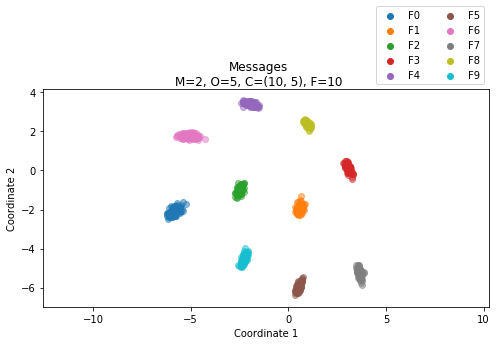

06-12-2019:15:23:10.609 INFO [game.py:312] Number of predicted clusters: 10


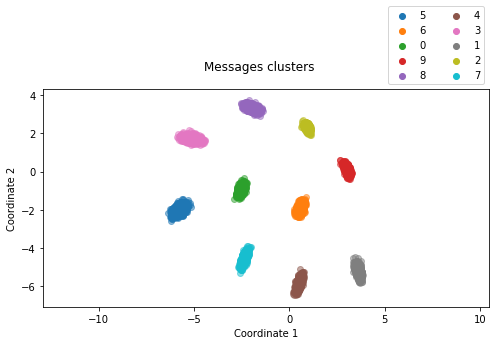

In [29]:
simulation_name = "acl_ready/extremity_game_acl_o_5__object_size_5__strict_context_1__shared_context_1__nature_includes_function_1__num_objects_10__mini_batch_size_128__num_batches_5000"
visualize_messages(simulation_name)

### Non-shared context

/Users/nur/.virtualenvs/ens/lib/python3.7/site-packages/dataclasses_json/core.py:138: RuntimeWarning: `NoneType` object value of non-optional type target_function detected when decoding Simulation.
  warnings.warn(f"`NoneType` object {warning}.", RuntimeWarning)
/Users/nur/.virtualenvs/ens/lib/python3.7/site-packages/dataclasses_json/core.py:138: RuntimeWarning: `NoneType` object value of non-optional type context_generator detected when decoding Simulation.
  warnings.warn(f"`NoneType` object {warning}.", RuntimeWarning)


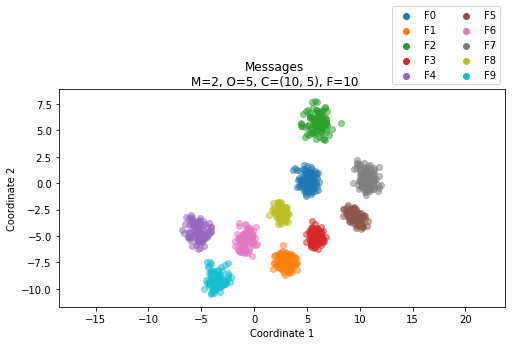

06-12-2019:15:23:21.856 INFO [game.py:312] Number of predicted clusters: 11


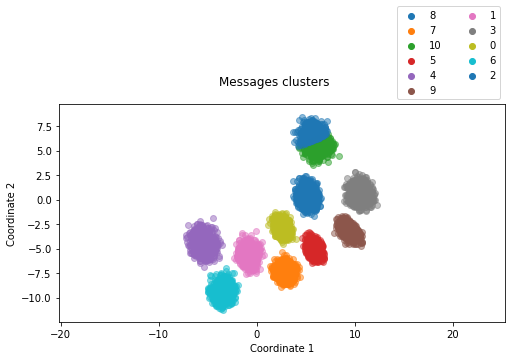

In [30]:
simulation_name = "acl_ready/extremity_game_acl_o_5__object_size_5__strict_context_1__shared_context_0__nature_includes_function_1__num_objects_10__mini_batch_size_128__num_batches_5000"
visualize_messages(simulation_name)

## LEFTOVER - IGNORE FOR NOW

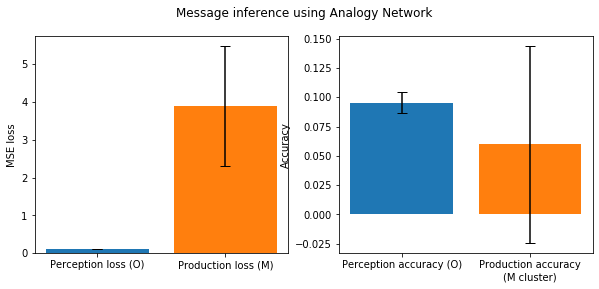

In [108]:
simulation_name = "Shared, strict context"
simulation_file_name = "nature_includes_fc/extremity_game_simulation_o_5__c_(10, 5)__m_2__sharedcontext_1__strict_context_1"

message_size = 2

loss_evals = {
    "Perception loss (O)": "analogy_compositionality_net_prediction_mean_loss",
    "Production loss (M)": "analogy_compositionality_net_message_mean_loss"
}
accuracy_evals = {
    "Perception accuracy (O)": "analogy_compositionality_net_prediction_mean_accuracy",
    "Production accuracy\n(M cluster)": "analogy_compositionality_net_message_cluster_mean_accuracy"
}

fig, ax = plt.subplots(1,2, figsize=(10,4))
bar_width = 1

for i, (display_name, eval_name) in enumerate(loss_evals.items()):
    mean, err = get_evaluation_mean_and_err(simulation_file_name, eval_name, message_size)
    ax[0].bar(i, mean, yerr=err, capsize=5, color=f"C{i}", label=display_name)

for i, (display_name, eval_name) in enumerate(accuracy_evals.items()):
    mean, err = get_evaluation_mean_and_err(simulation_file_name, eval_name, message_size)
    ax[1].bar(i, mean, yerr=err, capsize=5, color=f"C{i}", label=display_name)

ax[0].set_xticks(range(len(accuracy_evals)))
ax[0].set_xticklabels(list(loss_evals.keys()))

ax[1].set_xticks(range(len(loss_evals)))
ax[1].set_xticklabels(list(accuracy_evals.keys()))
    
ax[0].set_ylabel("MSE loss")
ax[1].set_ylabel("Accuracy")
fig.suptitle('Message inference using Analogy Network')
plt.show()